# The Cost to Live 
## A National Picture on Insulin Prices for Medicare Patients

### By Allison  Young
## 2/11/2019

Can you imagine if you had to pay a tax to breathe the oxygen we need in order to live?

Imagine if this tax was assigned randomly, to 1 out of every 10 Americans, and you are one of the unfortunate lottery winners designated as an "oxygen tax payer", and you have to pay $100 a month , or they will take away your oxygen (please bear with me in suspending reality a bit for this analogy).

Could you afford to breathe? Maybe? How about if you learned this tax was also increasing? Now, you have to pay $500 a month. 

Most people could not afford this fictional tax. As the chart below, from Data USA, demonstrates, while the mean income in Durham, NC may be more than $50,000 a year, the majority of residents make less $40k a year(1). 

In [1]:
from IPython.core.display import display, HTML
display(HTML('<iframe width="720px" height="480px" src="https://embed.datausa.io/profile/geo/durham-nc/economy/income_distro?" frameborder="0" ></iframe>'))

Because we can't have people just passing out on the street, we will say you can get get assistance to pay this unreasonable tax.  

But there is a catch! In order to receive assistance, you have to continually fill out paperwork every month, and have providers sign a piece of paper that affirms that yes, indeed, you still need oxygen to live. And you still have to pay $50 a month. 
 
If this doesn't sound fair, I agree with you; but, this burden is a reality for 1 in 10 Americans. This fictional analogy is not so different from the challenge individuals who have won the unfortunate genetic lottery and have a Diabetes diagnosis face when trying to get insulin, a diabetic's oxygen. 

Individuals with Diabetes are not able to regulate their blood sugar, and rely on daily injections of insulin to live. In type II Diabetes, there are some lifestyle factors which may increase one's risk of developing the disease. However, those with Type I Diabetes,also known as Juvenile Diabetes, are born with this condition. 

In the United States, there are approximately 1.25 million people in the United States with Type I Diabetes. My partner is one of them. She struggles regularly to balance wanting to maintain her independance as a productive member of society, and being able to afford her medications. She has to work to pay for her healthcare, but working also makes her health worse. But if she wants to exit this cycle, she would need to apply for disability support. On disability support, she would no longer be allowed to work at any job that would pay her more than $14,000 a year, thus sacrificing any semblance of financial independance (3). 


*Seeing my partner struggle to manage the financial cost of her disease, prompted me to wonder- how much is the US Government paying for these individuals who are unable to afford the sky-rocketing expenses of insulin?* 

This brought me to the following research question:

## How does the cost-burden of insulin compare to other common drugs utilized by a similar population of Medicare patients?

To answer this question, I examined **prescribed drug data for Medicaid D patients**, made available by the Centers for Medicare and Medicaid Services (CMS)(4). The data set I used is from 2014.

For this initial exploration, I used a dataset available at the drug-name level. In future analyses, I could use what I learn to develop more detailed research questions regarding North Carolina Residents and look at the full data set by the prescriber. However, this dataset is extremely large, with more than a million records. 

Therefore, an initial proof of concept is a good place to start, to understand big-picture themes that can guide further digging.

Below, is a preview of the actual dataset:


In [2]:
import pandas as pd
meddata = pd.read_excel("Prescription_Data_Medicaid_2014.xlsx")
df = pd.DataFrame(meddata)
print (df.head(5))

                         Drug Name                     Generic Name  \
0        1ST TIER UNIFINE PENTIPS      NEEDLES, INSULIN DISPOSABLE    
1        1ST TIER UNIFINE PENTIPS   PEN NEEDLE, DIABETIC,DISP UNIT    
2   1ST TIER UNIFINE PENTIPS PLUS      NEEDLES, INSULIN DISPOSABLE    
3                        ABACAVIR                 ABACAVIR SULFATE    
4  ABACAVIR-LAMIVUDINE-ZIDOVUDINE   ABACAVIR/LAMIVUDINE/ZIDOVUDINE    

  Number of Prescribers  Number of Medicare Part D Claims  \
0                  1424                              5314   
1                   877                              1474   
2                   605                              1137   
3                  5377                             68225   
4                  1625                             12195   

   Number of Standardized 30-Day Part D Fills  \
0                                      7970.1   
1                                      2687.5   
2                                      1939.6   
3         

#### The Dataset.

Below is a list of the variables included in this dataset:

In [3]:
print ("Number of Field Names:" , len(list(df)))
print (list(df))
drugs = df['Drug Name'].unique()
print ("\n")
print ("Unique Drug Names: ",len(drugs))

Number of Field Names: 24
['Drug Name', 'Generic Name', 'Number of Prescribers', 'Number of Medicare Part D Claims', 'Number of Standardized 30-Day Part D Fills', 'Aggregate Cost Paid for Part D Claims', 'Number of Medicare Beneficiaries', 'GE65 Suppression Flag', 'Number of Medicare Part D Claims for Beneficiaries 65+', 'Number of Standardized 30-Day Part D Fills for Beneficiaries 65+', 'Aggregate Cost Paid for Part D Claims for Beneficiaries 65+', 'Beneficiary 65+ Suppression Flag', 'Number of Medicare Beneficiaries 65+', 'Aggregate Cost Share for Beneficiaries with Low Income Subsidy', 'Aggregate Cost Share for Beneficiaries with No Low Income Subsidy', 'Opioid Drug Flag', 'Opioid Bool', 'Long-Acting Opioid Drug Flag', 'Long-Acting Opioid Bool', 'Antibiotic Drug Flag', 'Antibiotic Drug Bool', 'Antipsychotic Drug Flag', 'Antipsychotic Drug Bool', 'Diabetes Related Flag_AY']


Unique Drug Names:  3163



There are **3,163 different medications** in this dataset.
For each drug, the dataset includes information on the following:
* Drug Name
* Generic Name
* Number of Prescribers 
* Number of Medicare Part D Claims 
* Number of Standardized 30-Day Part D Fills 
* Aggregate Cost Paid for Part D Claims
* Number of Medicare Beneficiaries 
* Number of Medicare Part D Claims for Beneficiaries 65+ 
* Number of Standardized 30-Day Part D Fills for Beneficiaries 65+ 
* Aggregate Cost Paid for Part D Claims for Beneficiaries 65+
* Number of Medicare Beneficiaries 65+ 
* Aggregate Cost Share for Beneficiaries with Low Income Subsidy 
* Aggregate Cost Share for Beneficiaries with No Low Income Subsidy 

There are also fields to give information on the size of data, and if certain measures have been **supressed**, including:

* Beneficiary 65+ Suppression Flag 
* GE65 Suppression Flag 

Finally, the data have four **"Flags"** used to help group the types of drugs.

* Opioid Drug Flag 
* Long-Acting Opioid Drug Flag 
* Antibiotic Drug Flag 
* Antipsychotic Drug Flag 

*In this comparison, I will look specifically at a group of diabetes-related drugs (self-defined), as compared to the drug set flaged by the Opioid Drug Flags and Antipsychotic Drug Flags.*

#### Data Cleaning

As these data are maintained and cleaned by a large government agency, they are relatively complete and clean. However, it will be important to keep in mind the fields that may be supressed when looking at specific subgroups. Providers with fewer than 11 claims are entirely excluded from both this dataset, and the detailed dataset.

Additional fields are also included in the full dataset, as described in the CMS methodology documentation(5). Further investigation would need to take these into account, as the risk of suppression is much greater as the geography shrinks.



#### Data Transformations

In order to perform this analysis, it is necessary to create a user-defined variable of "Diabetes Drug Flag" to compare insulin drugs as a group to that of Opioids.

To do this, I used a reference website to identify the most common drug names for insulin product, and used the generic name field to identify additional insulin related records.

The most common insulin drugs used include:
* Humalog
* Novolog
* Apidra
* Novolin
* Velosulin
* Basaglar
* Lantus
* Toujeo
* Levemir
* Degludec

Using the generic drug field, I included the generic versions of these drugs, as well as other necessary products, such as syringes, and flexpens.



In [4]:
df['Diabetes Related Flag_AY'].head(15)

0       Y
1     NaN
2       Y
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
Name: Diabetes Related Flag_AY, dtype: object

In [5]:
diabetes = df.loc[df['Diabetes Related Flag_AY']=='Y']

diabetes.head(5)
print ("Number of Diabetes Related Drugs: ", len(diabetes))

Number of Diabetes Related Drugs:  75


In [6]:
#diabsum = diabetes.describe() # Difficult to read
print ("Total Expenditures for Diabetes Medications, 2014: ${0:,.2f}".format(sum(diabetes['Aggregate Cost Paid for Part D Claims'])))



Total Expenditures for Diabetes Medications, 2014: $8,484,299,218.08


In [7]:
df['Opioid Bool'].head(15)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    1.0
12    NaN
13    NaN
14    NaN
Name: Opioid Bool, dtype: float64

In [8]:

opioid = pd.DataFrame()
LAO = pd.DataFrame()
opioid = df.loc[df['Opioid Bool']==1]
opU = opioid['Drug Name'].unique()
print ("\n")
print ("Number of Flagged Opioid Drugs: ",len(opU))
LAO = df.loc[df['Long-Acting Opioid Bool']==1]
LAOU = LAO['Drug Name'].unique()
print ("Number of Flagged Long-Acting Opioid Drugs: ", len(LAOU))

#opioid.head(5)

#print(LAO)
#print(LAOU)



Number of Flagged Opioid Drugs:  96
Number of Flagged Long-Acting Opioid Drugs:  25


#### Data Context

There are **96** Drugs flagged as "Opioid Drugs", and of these, **25** are flagged as "Long-lasting Opioid drugs". For the purposes of this analysis I will treat the 96 drugs flagged as "Opioid Drugs" for comparison, as the 25 long-acting drugs will also be included.

Using the flag I developed, there are **75** Diabetes related drugs and products.



In [9]:

import matplotlib as plt
exop = sum(opioid['Aggregate Cost Paid for Part D Claims'])
print ("Total Expenditures for Opioid Medications, 2014: ${0:,.2f}".format(exop))

exdiab = sum(diabetes['Aggregate Cost Paid for Part D Claims'])
#print ("Total Expenditures for Long-Acting Opioid Medications, 2014: ${0:,.2f}".format(sum(LAO['Aggregate Cost Paid for Part D Claims'])))
print ("Total Expenditures for Diabetes Medications, 2014: ${0:,.2f}".format(exdiab))

exopLI = sum(opioid['Aggregate Cost Share for Beneficiaries with Low Income Subsidy'])
print ("Total Expenditures for Opioid Medications,Low Income Subsidy, 2014: ${0:,.2f}".format(exopLI))

exdiabLI = sum(diabetes['Aggregate Cost Share for Beneficiaries with Low Income Subsidy'])
#print ("Total Expenditures for Long-Acting Opioid Medications, 2014: ${0:,.2f}".format(sum(LAO['Aggregate Cost Paid for Part D Claims'])))
print ("Total Expenditures for Diabetes Medications,Low Income Subsidy, 2014: ${0:,.2f}".format(exdiabLI))


exopnLI = sum(opioid['Aggregate Cost Share for Beneficiaries with No Low Income Subsidy'])
print ("Total Expenditures for Opioid Medications,No Low Income Subsidy, 2014: ${0:,.2f}".format(exopnLI))

exdiabnLI = sum(diabetes['Aggregate Cost Share for Beneficiaries with No Low Income Subsidy'])
#print ("Total Expenditures for Long-Acting Opioid Medications, 2014: ${0:,.2f}".format(sum(LAO['Aggregate Cost Paid for Part D Claims'])))
print ("Total Expenditures for Diabetes Medications,No Low Income Subsidy, 2014: ${0:,.2f}".format(exdiabnLI))


Total Expenditures for Opioid Medications, 2014: $4,105,345,169.54
Total Expenditures for Diabetes Medications, 2014: $8,484,299,218.08
Total Expenditures for Opioid Medications,Low Income Subsidy, 2014: $58,944,069.41
Total Expenditures for Diabetes Medications,Low Income Subsidy, 2014: $50,065,626.37
Total Expenditures for Opioid Medications,No Low Income Subsidy, 2014: $504,943,250.58
Total Expenditures for Diabetes Medications,No Low Income Subsidy, 2014: $722,592,623.13


## In 2014, the cost for diabetes medications and products cost more than twice as much as those for opioids.

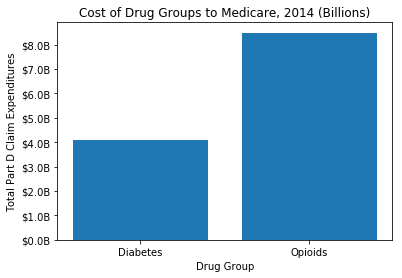

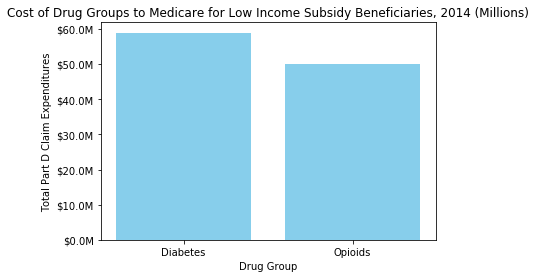

In [12]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = ["Diabetes", "Opioids"]
y = [exop,exdiab]


def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fB' % (x * 1e-9)


formatter = FuncFormatter(billions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, y)
#plt.bar(x, y, width, color="blue")
plt.title("Cost of Drug Groups to Medicare, 2014 (Billions)")
plt.xlabel("Drug Group")
plt.ylabel("Total Part D Claim Expenditures")
plt.show()

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

#x2 = ["Diabetes", "Opioids"]
y2 = [exopLI,exdiabLI]


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fK' % (x * 1e-3)

def percent(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 100)

def dollars(x, pos):
    'The two args are the value and tick position'
    return '$%1.1f' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, y2,color="skyblue")
plt.title("Cost of Drug Groups to Medicare for Low Income Subsidy Beneficiaries, 2014 (Millions)")
plt.xlabel("Drug Group")
plt.ylabel("Total Part D Claim Expenditures")
plt.show()


## Looking both at Diabetes medications and Opioid medications, low income beneficiaries receiving diabetes medication cost more to Medicare than low-income opioid medication recipients. 

Total Number of Opioid Filled Prescriptions on Medicare, 2014: 87,161,165
Total Number of Diabetes Filled Prescriptions on Medicare, 2014: 36,192,888
Average Cost per perscription to Medicare, Opioids, 2014: 47
Average Cost per perscription to Medicare, Diabetes, 2014: 234


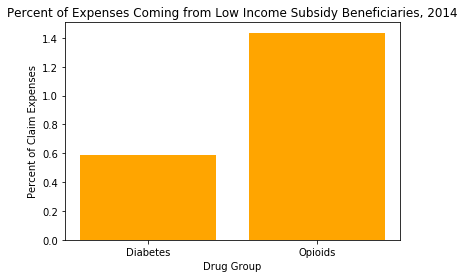

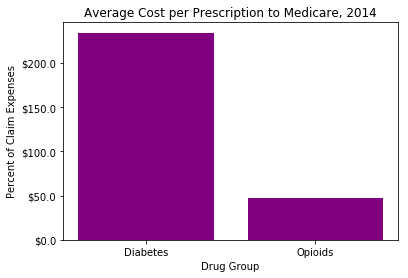

In [11]:

perLIdiab = exdiabLI/exdiab
perLIop = exopLI/exop

y3 = [perLIdiab,perLIop]


numpop = sum(opioid['Number of Standardized 30-Day Part D Fills'])
print ("Total Number of Opioid Filled Prescriptions on Medicare, 2014: {0:,.0f}".format(numpop))


numpdiab = sum(diabetes['Number of Standardized 30-Day Part D Fills'])
#print ("Total Expenditures for Long-Acting Opioid Medications, 2014: ${0:,.2f}".format(sum(LAO['Aggregate Cost Paid for Part D Claims'])))
print ("Total Number of Diabetes Filled Prescriptions on Medicare, 2014: {0:,.0f}".format(numpdiab))

#print(sum(opioid['Number of Medicare Beneficiaries']))
#print ("Total Number of Opioid Beneficiaries by Perscription (may include duplicates), 2014: {0:,.0f}".format(numbop))

cost_per_op = exop/numpop

cost_per_diab= exdiab/numpdiab

print ("Average Cost per perscription to Medicare, Opioids, 2014: {0:,.0f}".format(cost_per_op))
print ("Average Cost per perscription to Medicare, Diabetes, 2014: {0:,.0f}".format(cost_per_diab))

formatter = FuncFormatter(percent)


fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, y3, color="orange")
#plt.bar(x, y, width, color="blue")
plt.title("Percent of Expenses Coming from Low Income Subsidy Beneficiaries, 2014")
plt.xlabel("Drug Group")
plt.ylabel("Percent of Claim Expenses")
plt.show()

y4 = [cost_per_diab, cost_per_op]

formatter = FuncFormatter(dollars)


fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, y4, color="purple")
#plt.bar(x, y, width, color="blue")
plt.title("Average Cost per Prescription to Medicare, 2014")
plt.xlabel("Drug Group")
plt.ylabel("Percent of Claim Expenses")
plt.show()
#numbdiab = sum(diabetes['Number of Medicare Beneficiaries'])
#print ("Total Expenditures for Long-Acting Opioid Medications, 2014: ${0:,.2f}".format(sum(LAO['Aggregate Cost Paid for Part D Claims'])))
#print ("Total Number of Opioid Beneficiaries by Percription (may include duplicates),  2014: {0:,.0f}".format(numbdiab))


## However, the cost per prescription is much higher for diabetes patients than patients seeking opioid prescriptions; which one may presume means higher patient-share expenses for diabetes patients.


## Conclusions
Initial exploration says that while Medicare spends twice as much for **opioid medications** (approx **8 Bill** vs 4 Bill), Medicare's cost burden of low income beneficiaries is higher for individuals with **diabetes**, than opioids (approx **60 Mill** vs 50 Mill).

The cost per prescription is also higher for patients with **diabetes** medications than opioid medications (234 vs 47 dollars/30 day prescription).

One finding I found surprising is that a greater percentage of medicare beneficieries who are getting **opioid prescriptions** are also getting **low income subsidies**, as compared to medicare beneficiaries getting diabetes prescriptions (approx **1.4%** of total expenses vs 6%).

What is not considered in this analysis is that many individuals with Medicare, are also dually eligible for Medicaid. Diabetes is one of many reasons individuals will recieve disability support; thus, Medicaid is likely to pay even more than Medicare for diabetes medications. This is likely the reasoning behind the earlier noted finding I found surprising. Ideally, one would want to compare the Medicare and Medicaid data together. 


There is still much more to do with this data, but this proof of concept exploration was useful for determining next steps in this analysis. Further exploration into geographic patterns, individual patient loads, and different subgroups would be recommended. If data were considered for patients younger than 65 (those on Medicare), and who were recieving other forms of healthcare subsidies, such as Medicaid, the results would likely be quite different. 



Sources:

1. https://datausa.io/profile/geo/durham-nc/#economy
2. http://www.diabetes.org/diabetes-basics/statistics/
3. https://www.disability-benefits-help.org/faq/how-much-to-earn-to-qualify
4. https://www.cms.gov/Research-Statistics-Data-and-Systems/Research-Statistics-Data-and-Systems.html